## <html><body><center><h1 style="color:#385d6e">Analysis of Indian Population</h1></center></body></html>

In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## <h1 style="color:#A1605E">Starting with Indian Population<h1><ul>
  <h3 style="color:#525EAD"><li>Reading Indian Population in CSV file </li></h3>
</ul>

In [2]:
df = pd.read_csv('india-population.csv',sep=r'\s*,\s*',engine='python',skiprows=15)
print(df.head(90))

          date  Population  Annual % Change
0   1950-12-31   376325200              NaN
1   1951-12-31   382376948             1.61
2   1952-12-31   388799073             1.68
3   1953-12-31   395544369             1.73
4   1954-12-31   402578596             1.78
..         ...         ...              ...
85  2035-12-31  1553723810             0.59
86  2036-12-31  1562439265             0.56
87  2037-12-31  1570690442             0.53
88  2038-12-31  1578478179             0.50
89  2039-12-31  1585809320             0.46

[90 rows x 3 columns]


## <ul>
  <h3 style="color:#525EAD"><li>Reading types of column </li></h3>
</ul>

In [3]:
df.dtypes

date                object
Population           int64
Annual % Change    float64
dtype: object

## <ul>
  <h3 style="color:#525EAD"><li>Renaming types of column </li></h3>
</ul>

In [4]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Population':'Population'})
df = df.rename(columns={'date':'Year'})

## <ul>
  <h3 style="color:#525EAD"><li>Separating values with comma</li></h3>
</ul>

In [5]:
df['Population'] = df['Population'].apply(lambda x:"{:,}".format(x))

## <ul>
  <h3 style="color:#525EAD"><li>Spliting column to get only year</li></h3>
</ul>

In [6]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df)
#print(df.head(90))

     Year     Population  Annual_percent_change
0    1950    376,325,200                    NaN
1    1951    382,376,948                   1.61
2    1952    388,799,073                   1.68
3    1953    395,544,369                   1.73
4    1954    402,578,596                   1.78
5    1955    409,880,595                   1.81
6    1956    417,442,811                   1.84
7    1957    425,270,695                   1.88
8    1958    433,380,978                   1.91
9    1959    441,798,578                   1.94
10   1960    450,547,679                   1.98
11   1961    459,642,165                   2.02
12   1962    469,077,190                   2.05
13   1963    478,825,608                   2.08
14   1964    488,848,135                   2.09
15   1965    499,123,324                   2.10
16   1966    509,631,500                   2.11
17   1967    520,400,576                   2.11
18   1968    531,513,824                   2.14
19   1969    543,084,336                

## <ul>
  <h3 style="color:#525EAD"><li>checking for null values </li></h3>
</ul>

In [7]:
df.isnull().sum()

Year                     0
Population               0
Annual_percent_change    1
dtype: int64

##  <ul>
  <h3 style="color:#525EAD"><li>using fillna(0) method to handle NaN data </li></h3>
</ul>

In [8]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)

## <ul>
  <h3 style="color:#525EAD"><li> we will be analysing data upto year 2020 so we are slicing and creating new data frame </li></h3>
</ul>

In [9]:
df_pop = df.iloc[:72]
year_list = df_pop['Year'].tolist()

## <html><body><ul>
  <h3 style="color:#525EAD"><li>ploting graphs and comparisions</li></h3>
</ul>

Text(0.5, 1.0, 'Population from 2010 to 2020')

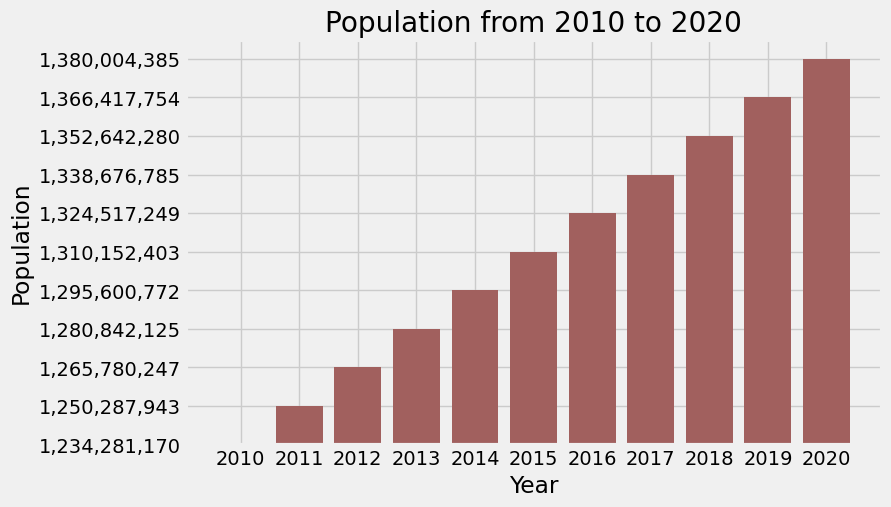

In [10]:
plt.figure(figsize=(8,5))
plt.bar(df_pop['Year'][60:71],df_pop['Population'][60:71],color="#A1605E")
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population from 2010 to 2020')

Text(0.5, 1.0, 'Annual change rate from 2010 to 2020')

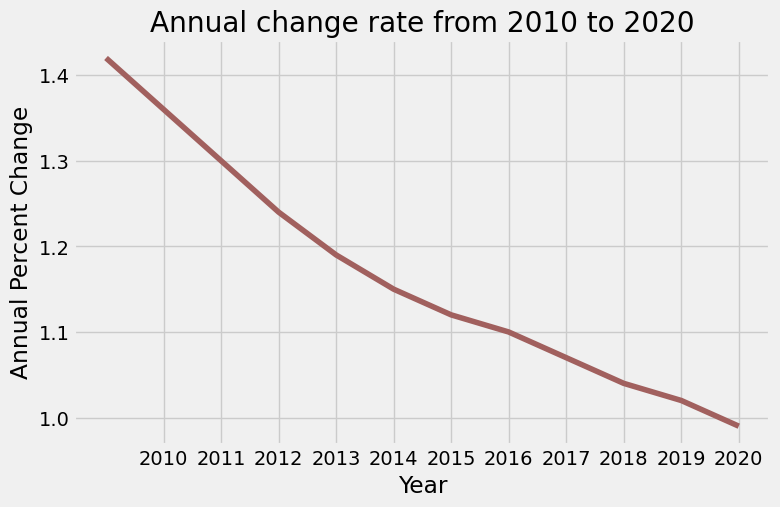

In [12]:
plt.figure(figsize=(8,5))
plt.plot(df_pop['Year'][59:71],df_pop['Annual_percent_change'][59:71],color="#A1605E")
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Annual Percent Change')
plt.title('Annual change rate from 2010 to 2020')

## <html><body><ul>
  <h3 style="color:#525EAD"><li>we will be analysing data from 1999 to 2009</li></h3>
</ul>

Text(0.5, 1.0, 'Population from 1999 to 2009')

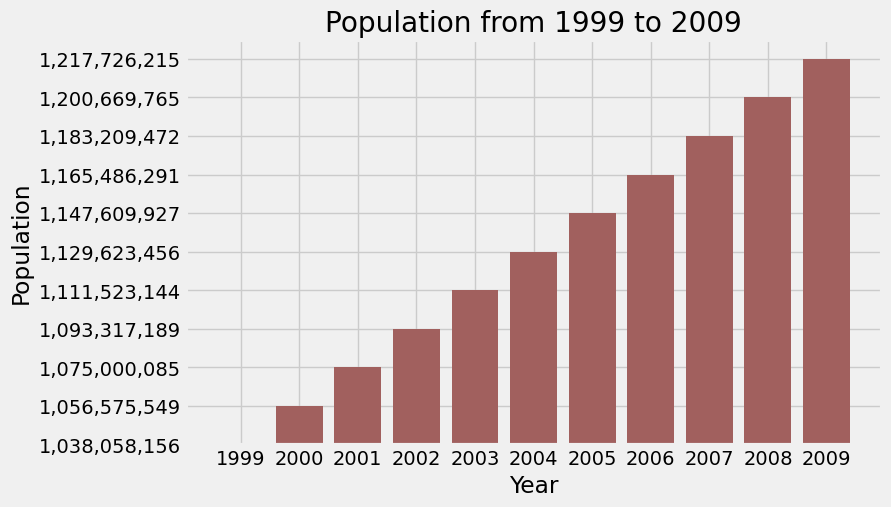

In [11]:
plt.figure(figsize=(8,5))
plt.bar(df_pop['Year'][49:60],df_pop['Population'][49:60],color="#A1605E")
plt.xticks([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population from 1999 to 2009')

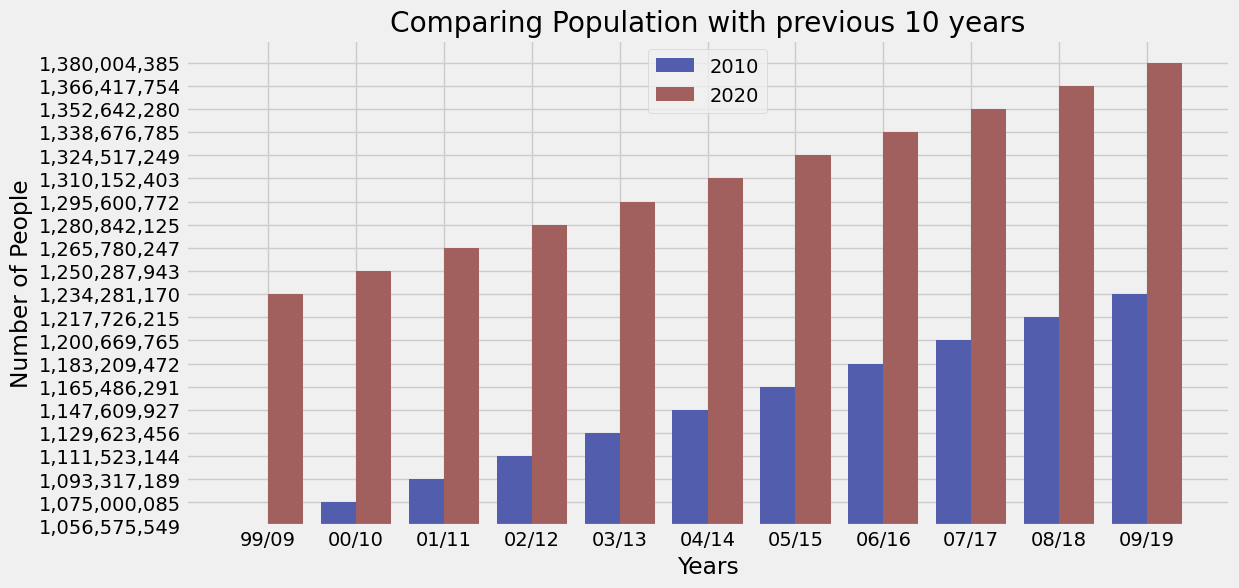

<Figure size 640x480 with 0 Axes>

In [12]:
# comparing Birth rate with previous 10 years
plt.figure(figsize=(12,6))
data_2000_2010 = (
 '1,056,575,549',
 '1,075,000,085',
 '1,093,317,189',
 '1,111,523,144',
 '1,129,623,456',
 '1,147,609,927',
 '1,165,486,291',
 '1,183,209,472',
 '1,200,669,765',
 '1,217,726,215',
 '1,234,281,170')
data_2010_2020 = ('1,234,281,170',
 '1,250,287,943',
 '1,265,780,247',
 '1,280,842,125',
 '1,295,600,772',
 '1,310,152,403',
 '1,324,517,249',
 '1,338,676,785',
 '1,352,642,280',
 '1,366,417,754',
 '1,380,004,385')
ind = np.arange(11)
width = 0.40
plt.bar(ind, data_2000_2010, width, label = '2010',color="#525EAD")
plt.bar(ind+width, data_2010_2020, width, label = '2020',color="#A1605E")
plt.xticks(ind+width/2, ('99/09','00/10','01/11','02/12','03/13','04/14','05/15','06/16','07/17','08/18','09/19'))
plt.title('Comparing Population with previous 10 years')
plt.xlabel('Years')
plt.ylabel('Number of People')
legend = plt.legend(loc='upper center')
plt.show()
plt.tight_layout()


## <h1 style="color:#A1605E">Starting with Birth-Rate<h1><ul>
  <h3 style="color:#525EAD"><li>Reading Birth-Rate in CSV file</li></h3>
</ul>

In [13]:
df = pd.read_csv('birth-rate.csv',sep=r'\s*,\s*',engine='python')
#print(df.head(80))
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df)

           date  Births per 1000 People  Annual % Change
0    31-12-1950                  44.175              NaN
1    31-12-1951                  43.970            -0.46
2    31-12-1952                  43.764            -0.47
3    31-12-1953                  43.558            -0.47
4    31-12-1954                  43.352            -0.47
5    31-12-1955                  43.146            -0.48
6    31-12-1956                  42.941            -0.48
7    31-12-1957                  42.735            -0.48
8    31-12-1958                  42.529            -0.48
9    31-12-1959                  42.298            -0.54
10   31-12-1960                  42.066            -0.55
11   31-12-1961                  41.835            -0.55
12   31-12-1962                  41.603            -0.55
13   31-12-1963                  41.372            -0.56
14   31-12-1964                  41.051            -0.78
15   31-12-1965                  40.731            -0.78
16   31-12-1966                

## <ul>
  <h3 style="color:#525EAD"><li>Reading types of column </li></h3>
</ul>

In [14]:
df.dtypes

date                       object
Births per 1000 People    float64
Annual % Change           float64
dtype: object

## <ul>
  <h3 style="color:#525EAD"><li>Renaming types of column </li></h3>
</ul>

In [15]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Births per 1000 People':'Births_per_1000'})
df = df.rename(columns={'date':'Year'})

## <ul>
  <h3 style="color:#525EAD"><li>Spliting column to get only year</li></h3>
</ul>

In [16]:
df['Year'] = df['Year'].str.split('-').str[-1]
df['Year'] = df['Year'].astype(int)

## <ul>
  <h3 style="color:#525EAD"><li>Reading types of column </li></h3>
</ul>

In [17]:
df.dtypes

Year                       int32
Births_per_1000          float64
Annual_percent_change    float64
dtype: object

## <ul>
  <h3 style="color:#525EAD"><li>checking for null values </li></h3>
</ul>

In [18]:
df.isnull().sum()

Year                     0
Births_per_1000          0
Annual_percent_change    1
dtype: int64

##  <ul>
  <h3 style="color:#525EAD"><li>using fillna(0) method to handle NaN data </li></h3>
</ul>

In [19]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)

## <ul>
  <h3 style="color:#525EAD"><li> we will be analysing data upto year 2020 so we are slicing and creating new data frame </li></h3>
</ul>

In [20]:
df_cbr = df.iloc[:72]
year_list = df_cbr['Year'].tolist()

## <html><body><ul>
  <h3 style="color:#525EAD"><li>ploting graphs and comparisions</li></h3>
</ul>

Text(0.5, 1.0, 'Birth rate from 2010 to 2020')

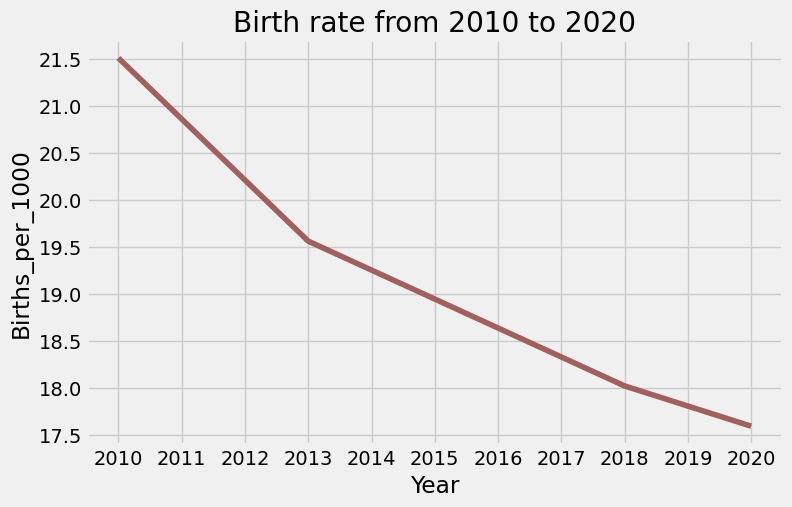

In [21]:
plt.figure(figsize=(8,5))
plt.plot(df_cbr['Year'][60:71],df_cbr['Births_per_1000'][60:71],color="#A1605E")
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
#plt.yticks(np.arange(17,23,step=0.5))
plt.xlabel('Year')
plt.ylabel('Births_per_1000')
plt.title('Birth rate from 2010 to 2020')

Text(0.5, 1.0, 'Annual change rate from 2010 to 2020')

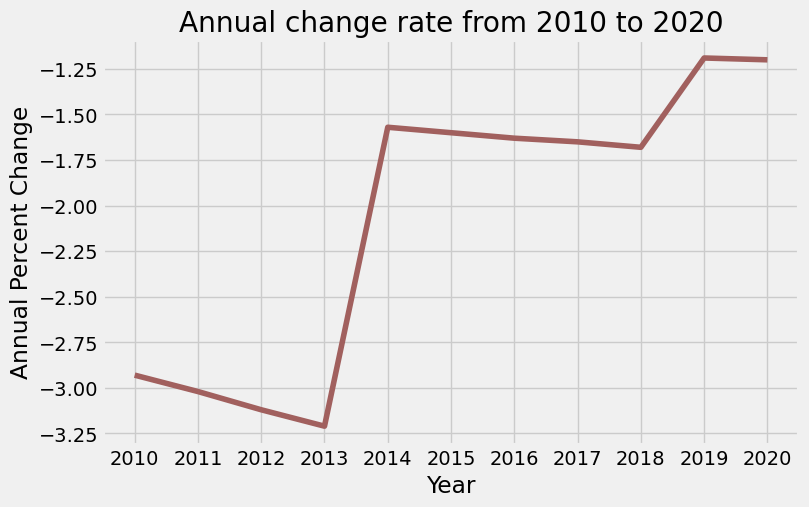

In [22]:
plt.figure(figsize=(8,5))
plt.plot(df_cbr['Year'][60:71],df_cbr['Annual_percent_change'][60:71],color="#A1605E")
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Annual Percent Change')
plt.title('Annual change rate from 2010 to 2020')

Text(0, 0.5, 'Values')

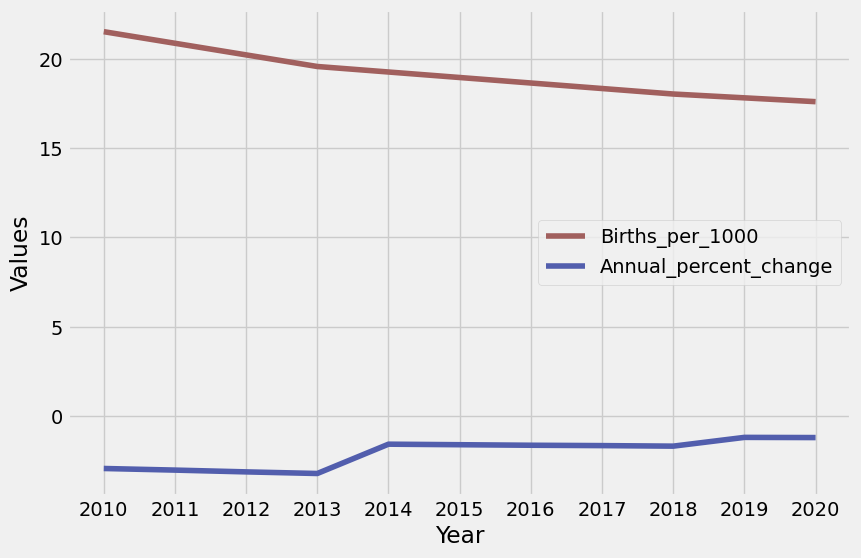

In [23]:
df_plot = df_cbr[['Births_per_1000','Annual_percent_change']][60:71]
color=['#A1605E','#525EAD']
ax = df_plot.plot(kind='line', figsize=(9,6),color=color)
ax.set_xticks(df_cbr.index[60:71]);
ax.set_xticklabels([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')

Text(0.5, 1.0, 'Birth rate from 2000 to 2010')

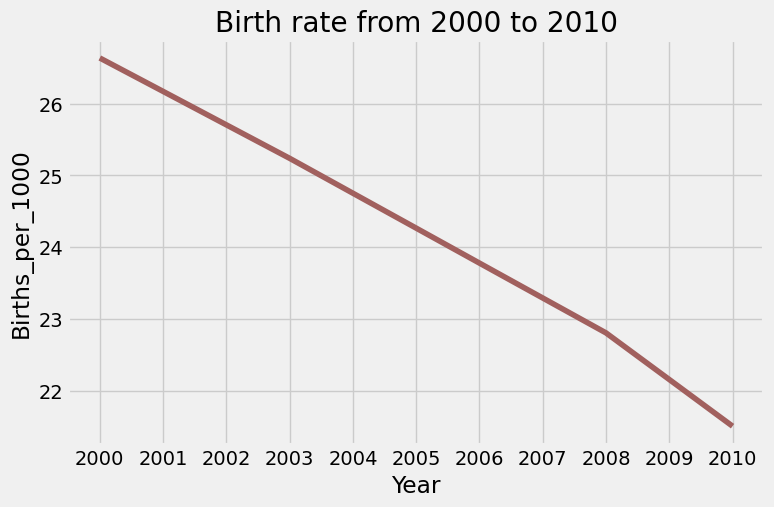

In [24]:
plt.figure(figsize=(8,5))
plt.plot(df_cbr['Year'][50:61],df_cbr['Births_per_1000'][50:61],color="#A1605E")
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
plt.xlabel('Year')
plt.ylabel('Births_per_1000')
plt.title('Birth rate from 2000 to 2010')

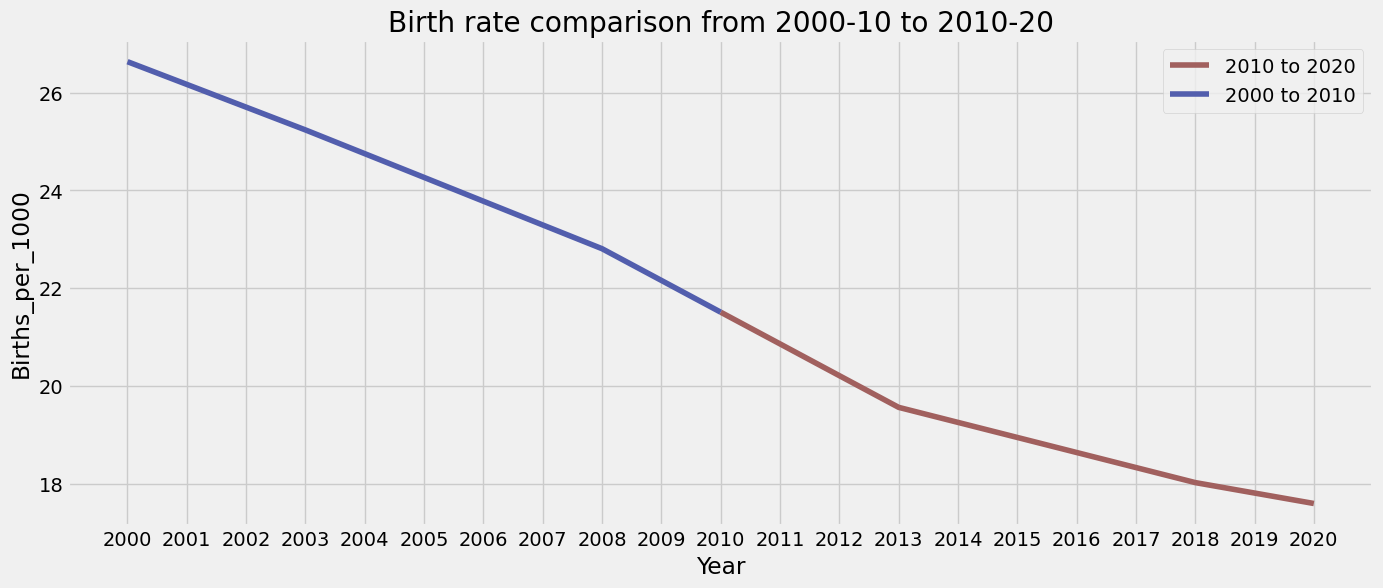

In [25]:
# comparing Birth rate with previous 10 years
x = [i for i in range(50,71,1)]
y = [i for i in range(2000,2021,1)]
plt.figure(figsize=(15,6))

plt.plot(df_cbr['Births_per_1000'][60:71], label='2010 to 2020',color='#A1605E')
plt.plot(df_cbr['Births_per_1000'][50:61],label='2000 to 2010',color='#525EAD')
plt.xticks(x,y)
plt.xlabel('Year')
plt.ylabel('Births_per_1000')
plt.title('Birth rate comparison from 2000-10 to 2010-20')
plt.legend()

## <h1 style="color:#A1605E">Starting with Death-Rate<h1><ul>
  <h3 style="color:#525EAD"><li>Reading Death-Rate in CSV file</li></h3>
</ul>

In [26]:
df = pd.read_csv('death-rate.csv',sep=r'\s*,\s*',engine='python', skiprows=15)
#print(df.head(80))
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df)

           date  Deaths per 1000 People  Annual % Change
0    1950-12-31                  28.161              NaN
1    1951-12-31                  27.584            -2.05
2    1952-12-31                  27.008            -2.09
3    1953-12-31                  26.432            -2.13
4    1954-12-31                  25.856            -2.18
5    1955-12-31                  25.280            -2.23
6    1956-12-31                  24.703            -2.28
7    1957-12-31                  24.127            -2.33
8    1958-12-31                  23.551            -2.39
9    1959-12-31                  23.016            -2.27
10   1960-12-31                  22.481            -2.32
11   1961-12-31                  21.946            -2.38
12   1962-12-31                  21.411            -2.44
13   1963-12-31                  20.876            -2.50
14   1964-12-31                  20.374            -2.40
15   1965-12-31                  19.873            -2.46
16   1966-12-31                

## <ul>
  <h3 style="color:#525EAD"><li>Renaming types of column </li></h3>
</ul>

In [27]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Deaths per 1000 People':'Deaths_per_1000'})
df = df.rename(columns={'date':'Year'})

## <ul>
  <h3 style="color:#525EAD"><li>Reading types of column </li></h3>
</ul>

In [28]:
df.dtypes

Year                      object
Deaths_per_1000          float64
Annual_percent_change    float64
dtype: object

## <ul>
  <h3 style="color:#525EAD"><li>Spliting column to get only year</li></h3>
</ul>

In [29]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)

## <ul>
  <h3 style="color:#525EAD"><li>checking for null values </li></h3>
</ul>

In [30]:
df.isnull().sum()

Year                     0
Deaths_per_1000          0
Annual_percent_change    1
dtype: int64

##  <ul>
  <h3 style="color:#525EAD"><li>using fillna(0) method to handle NaN data </li></h3>
</ul>

In [31]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)

## <ul>
  <h3 style="color:#525EAD"><li> we will be analysing data upto year 2020 so we are slicing and creating new data frame </li></h3>
</ul>

In [32]:
df_dr = df.iloc[:72]
year_list = df_dr['Year'].tolist()
df_dr.head()

,Year,Deaths_per_1000,Annual_percent_change
0,1950,28.161,0.00
1,1951,27.584,-2.05
2,1952,27.008,-2.09
3,1953,26.432,-2.13
4,1954,25.856,-2.18


## <ul>
  <h3 style="color:#525EAD"><li>Reading types of column </li></h3>
</ul>

In [33]:
df.dtypes

Year                       int32
Deaths_per_1000          float64
Annual_percent_change    float64
dtype: object

## <html><body><ul>
  <h3 style="color:#525EAD"><li>ploting graphs and comparisions</li></h3>
</ul>

Text(0.5, 1.0, 'Death rate from 2010 to 2020')

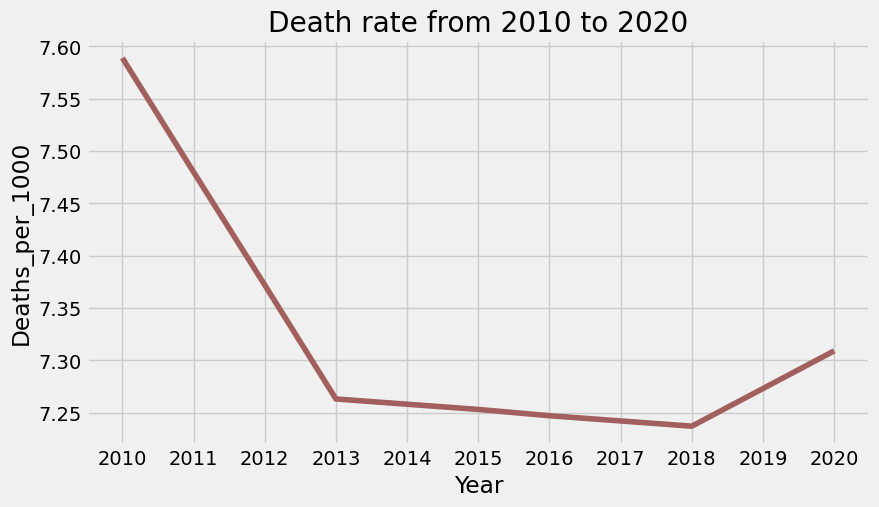

In [34]:
plt.figure(figsize=(9,5))
plt.plot(df_dr['Year'][60:71],df_dr['Deaths_per_1000'][60:71],color='#A1605E')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000')
plt.title('Death rate from 2010 to 2020')

Text(0.5, 1.0, 'Annual Rate from 2010 to 2020')

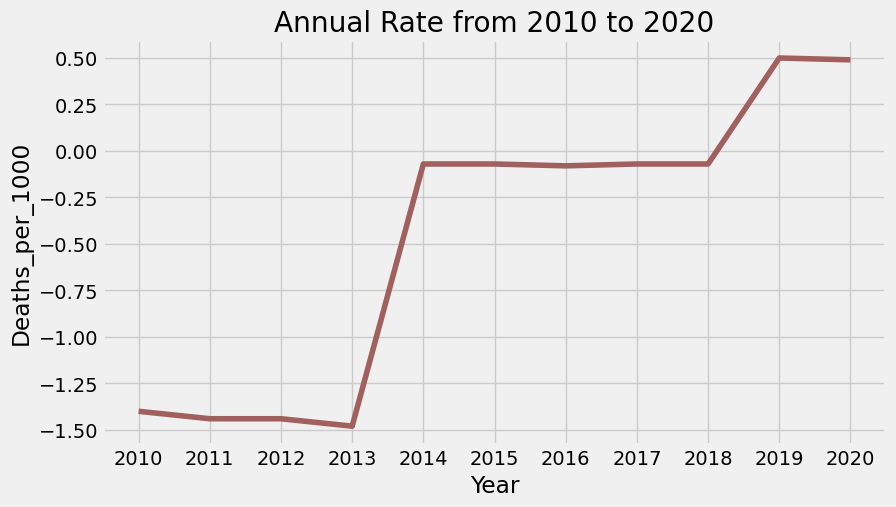

In [35]:
plt.figure(figsize=(9,5))
plt.plot(df_dr['Year'][60:71],df_dr['Annual_percent_change'][60:71],color='#A1605E')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000')
plt.title('Annual Rate from 2010 to 2020')

Text(0.5, 1.0, 'Death vs Annual percent change')

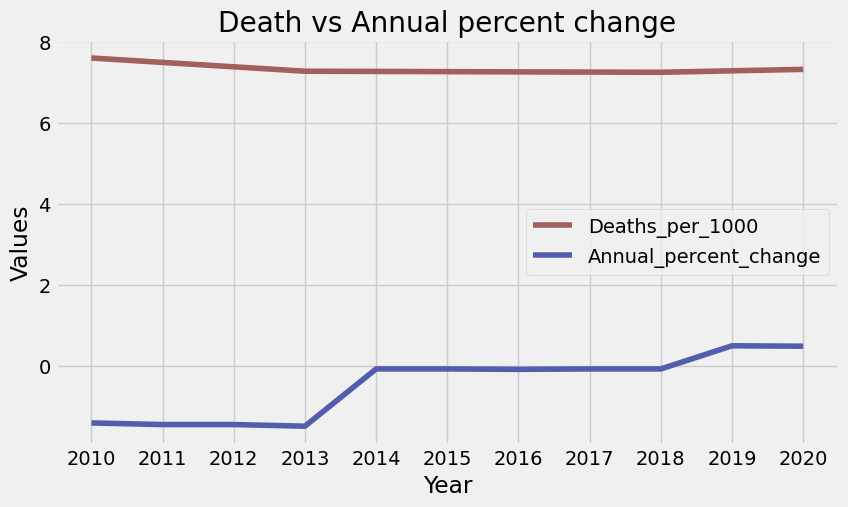

In [36]:
df_plot = df_dr[['Deaths_per_1000','Annual_percent_change']][60:71]
color=['#A1605E','#525EAD']
ax = df_plot.plot(kind='line', figsize=(9,5),color=color)
ax.set_xticks(df_dr.index[60:71]);
ax.set_xticklabels([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')
legend = plt.legend(loc='center right')
ax.set_title('Death vs Annual percent change')

Text(0.5, 1.0, 'Death rate from 2000 to 2010')

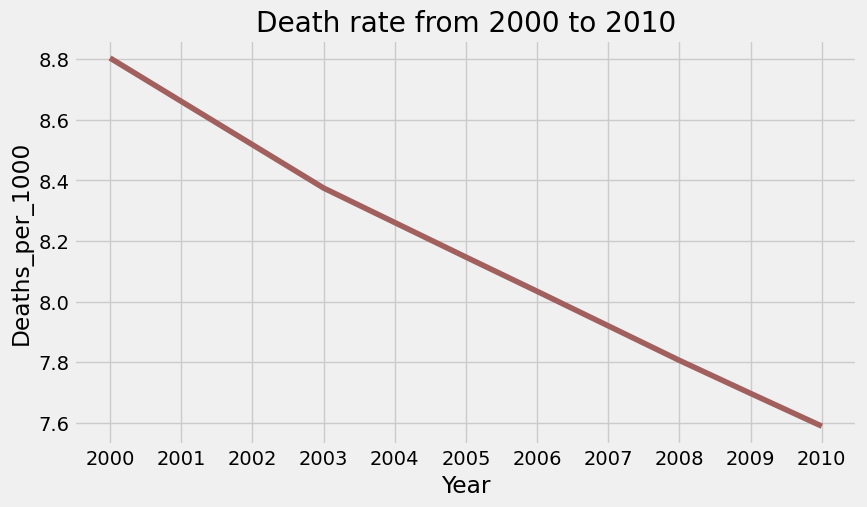

In [37]:
plt.figure(figsize=(9,5))
plt.plot(df_dr['Year'][50:61],df_dr['Deaths_per_1000'][50:61],color='#A1605E')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000')
plt.title('Death rate from 2000 to 2010')

Text(0.5, 1.0, 'Death rate comparison from 2000-10 to 2010-20')

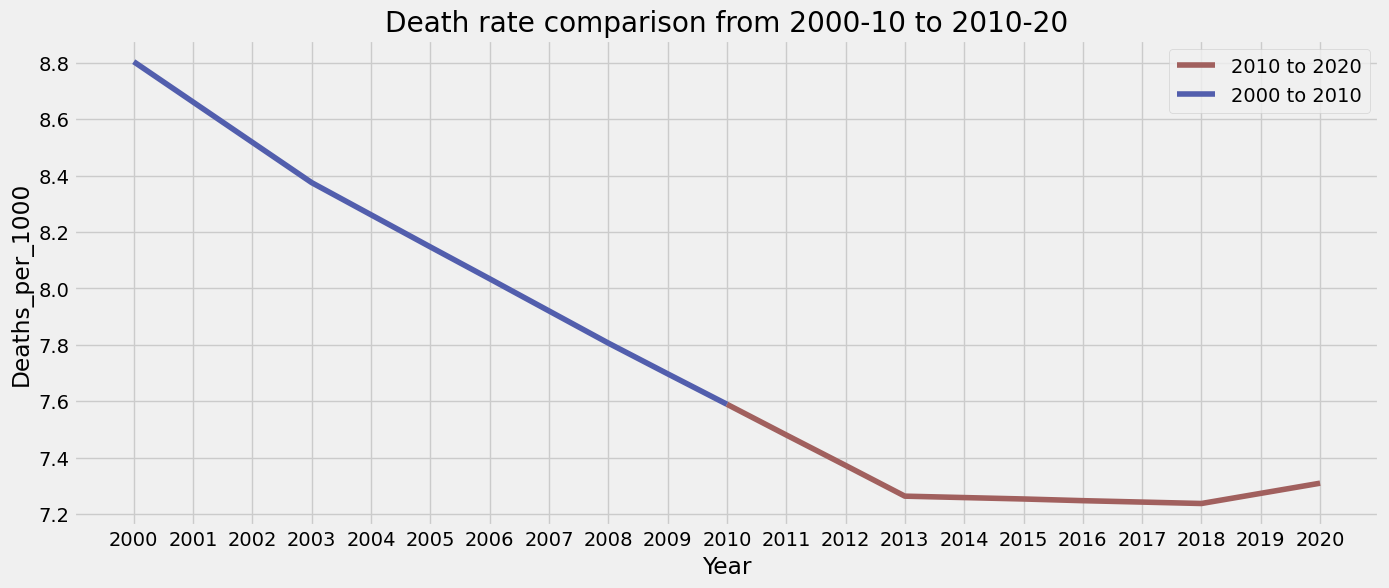

In [38]:
# comparing Death rate with previous 10 years
x = [i for i in range(50,71,1)]
y = [i for i in range(2000,2021,1)]
plt.figure(figsize=(15,6))
plt.plot(df_dr['Deaths_per_1000'][60:71], label='2010 to 2020',color='#A1605E')
plt.plot(df_dr['Deaths_per_1000'][50:61],label='2000 to 2010',color='#525EAD')
plt.xticks(x,y)
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000')
plt.legend()
plt.title('Death rate comparison from 2000-10 to 2010-20')

## <h1 style="color:#A1605E">Starting with Fertility-Rate<h1><ul>
  <h3 style="color:#525EAD"><li>Reading Fertility-Rate in CSV file</li></h3>
</ul>

In [39]:
df = pd.read_csv('fertitlty-rate.csv',sep=r'\s*,\s*',engine='python', skiprows=15)
#print(df.head(80))
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df)

           date  Births per Woman  Annual % Change
0    1950-12-31             5.907              NaN
1    1951-12-31             5.906            -0.02
2    1952-12-31             5.904            -0.03
3    1953-12-31             5.903            -0.02
4    1954-12-31             5.902            -0.02
5    1955-12-31             5.900            -0.03
6    1956-12-31             5.899            -0.02
7    1957-12-31             5.897            -0.03
8    1958-12-31             5.896            -0.02
9    1959-12-31             5.895            -0.02
10   1960-12-31             5.894            -0.02
11   1961-12-31             5.892            -0.03
12   1962-12-31             5.891            -0.02
13   1963-12-31             5.890            -0.02
14   1964-12-31             5.857            -0.56
15   1965-12-31             5.823            -0.58
16   1966-12-31             5.790            -0.57
17   1967-12-31             5.756            -0.59
18   1968-12-31             5.7

## <ul>
  <h3 style="color:#525EAD"><li>Renaming types of column </li></h3>
</ul>

In [40]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Births per Woman':'Births_per_woman'})
df = df.rename(columns={'date':'Year'})

## <ul>
  <h3 style="color:#525EAD"><li>Reading types of column </li></h3>
</ul>

In [41]:
df.dtypes

Year                      object
Births_per_woman         float64
Annual_percent_change    float64
dtype: object

## <ul>
  <h3 style="color:#525EAD"><li>Spliting column to get only year</li></h3>
</ul>

In [42]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)

## <ul>
  <h3 style="color:#525EAD"><li>checking for null values </li></h3>
</ul>

In [43]:
df.isnull().sum()

Year                     0
Births_per_woman         0
Annual_percent_change    1
dtype: int64

##  <ul>
  <h3 style="color:#525EAD"><li>using fillna(0) method to handle NaN data </li></h3>
</ul>

In [44]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)

## <ul>
  <h3 style="color:#525EAD"><li> we will be analysing data upto year 2020 so we are slicing and creating new data frame </li></h3>
</ul>

In [45]:
df_fr = df.iloc[:72]
df_fr.head()

,Year,Births_per_woman,Annual_percent_change
0,1950,5.907,0.00
1,1951,5.906,-0.02
2,1952,5.904,-0.03
3,1953,5.903,-0.02
4,1954,5.902,-0.02


## <html><body><ul>
  <h3 style="color:#525EAD"><li>ploting graphs and comparisions</li></h3>
</ul>

Text(0.5, 1.0, 'Births per woman from 2010 to 2020')

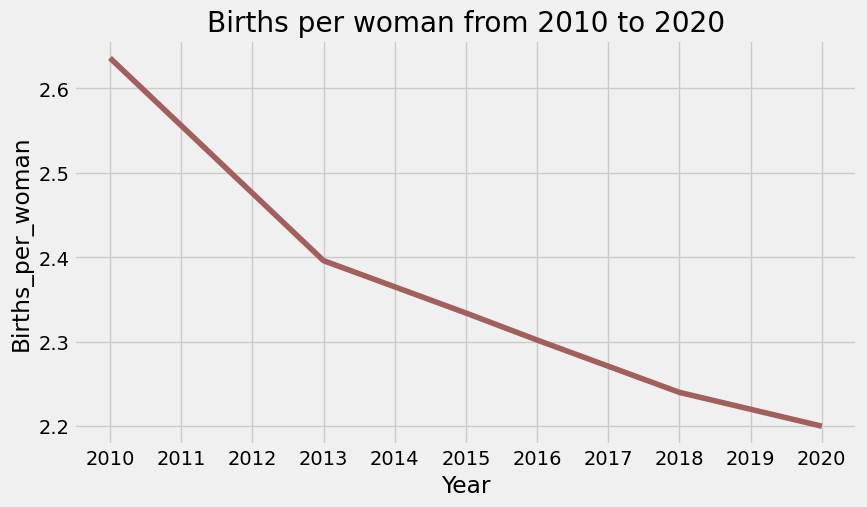

In [46]:
plt.figure(figsize=(9,5))
plt.plot(df_fr['Year'][60:71],df_fr['Births_per_woman'][60:71],color='#A1605E')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Births_per_woman')
plt.title('Births per woman from 2010 to 2020')

Text(0.5, 1.0, 'Annual Rate from 2010 to 2020')

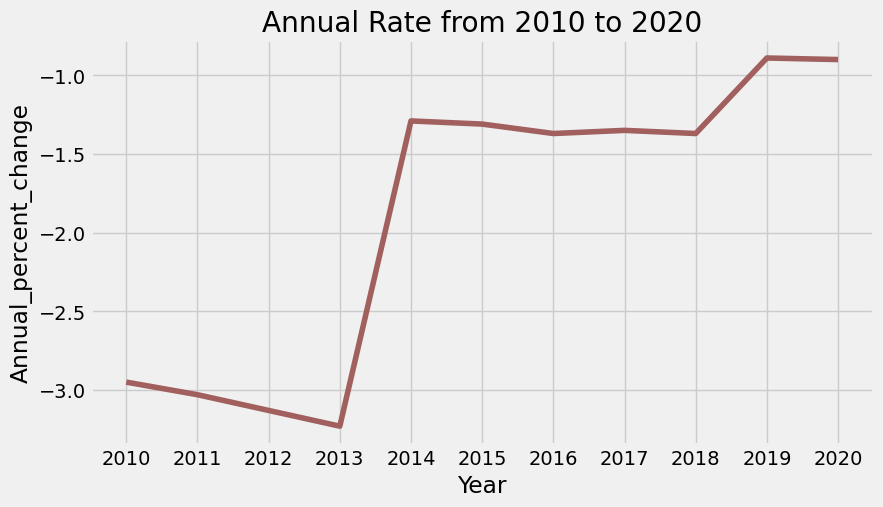

In [47]:
plt.figure(figsize=(9,5))
plt.plot(df_fr['Year'][60:71],df_fr['Annual_percent_change'][60:71],color='#A1605E')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Annual_percent_change')
plt.title('Annual Rate from 2010 to 2020')

Text(0.5, 1.0, 'Birth vs Annual percent change')

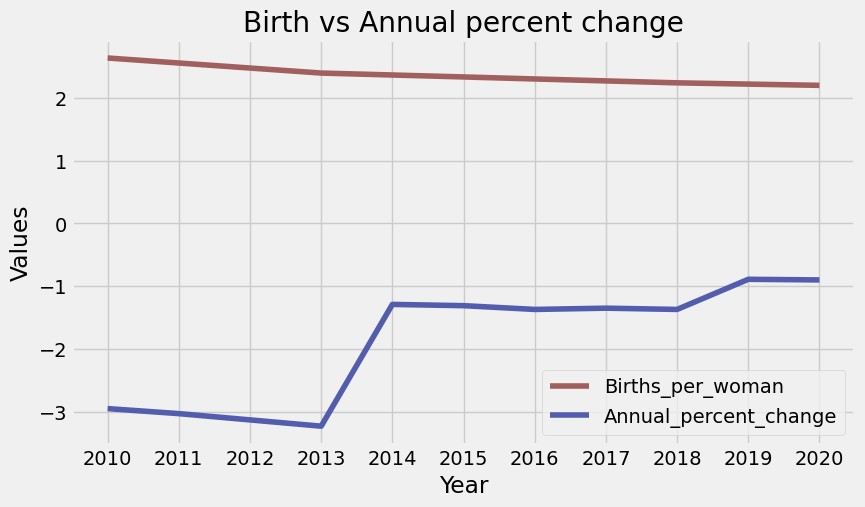

In [48]:
df_plot = df_fr[['Births_per_woman','Annual_percent_change']][60:71]
color=['#A1605E','#525EAD']
ax = df_plot.plot(kind='line', figsize=(9,5),color=color)
ax.set_xticks(df_fr.index[60:71]);
ax.set_xticklabels([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Birth vs Annual percent change')

Text(0.5, 1.0, 'Births_per_woman from 2000 to 2010')

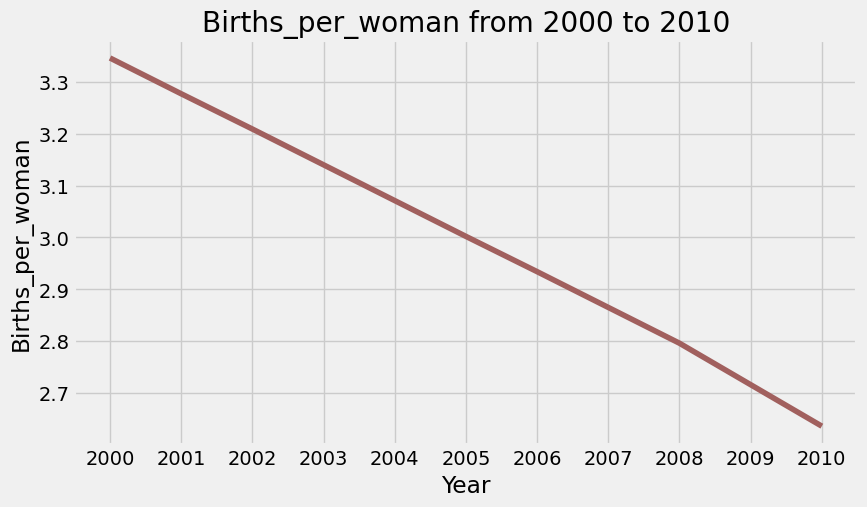

In [49]:
plt.figure(figsize=(9,5))
plt.plot(df_fr['Year'][50:61],df_fr['Births_per_woman'][50:61],color='#A1605E')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
plt.xlabel('Year')
plt.ylabel('Births_per_woman')
plt.title('Births_per_woman from 2000 to 2010')

Text(0.5, 1.0, 'Births_per_woman comparison from 2000-10 to 2010-20')

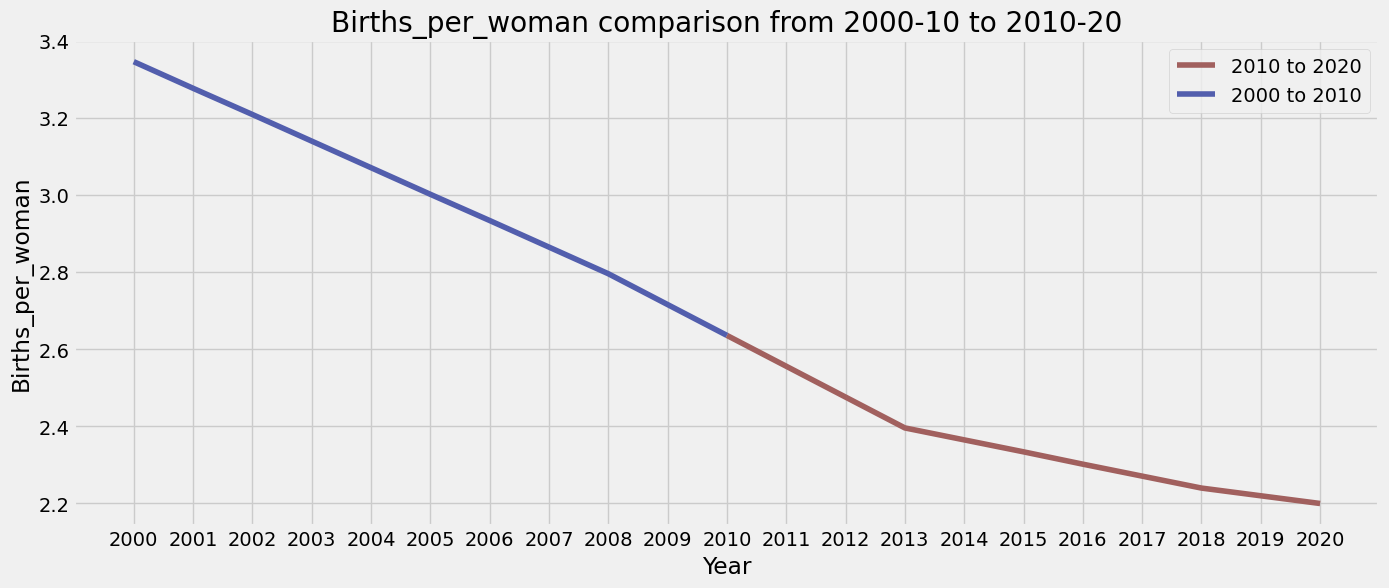

In [50]:
# comparing Death rate with previous 10 years
x = [i for i in range(50,71,1)]
y = [i for i in range(2000,2021,1)]
plt.figure(figsize=(15,6))
plt.plot(df_fr['Births_per_woman'][60:71], label='2010 to 2020',color='#A1605E')
plt.plot(df_fr['Births_per_woman'][50:61],label='2000 to 2010',color='#525EAD')
plt.xticks(x,y)
plt.xlabel('Year')
plt.ylabel('Births_per_woman')
plt.legend()
plt.title('Births_per_woman comparison from 2000-10 to 2010-20')

## <h1 style="color:#A1605E">Starting with Infant-Mortality-Rate<h1><ul>
  <h3 style="color:#525EAD"><li>Reading Infant-Mortality-Rate in CSV file</li></h3>
</ul>

In [51]:
df = pd.read_csv('infant-mortality-rate.csv',sep=r'\s*,\s*',engine='python', skiprows=15)
#print(df.head(80))
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df)

           date  Deaths per 1000 Live Births  Annual % Change
0    1950-12-31                      189.629              NaN
1    1951-12-31                      186.737            -1.53
2    1952-12-31                      183.846            -1.55
3    1953-12-31                      180.954            -1.57
4    1954-12-31                      178.062            -1.60
5    1955-12-31                      175.171            -1.62
6    1956-12-31                      172.279            -1.65
7    1957-12-31                      169.388            -1.68
8    1958-12-31                      166.496            -1.71
9    1959-12-31                      164.119            -1.43
10   1960-12-31                      161.742            -1.45
11   1961-12-31                      159.366            -1.47
12   1962-12-31                      156.989            -1.49
13   1963-12-31                      154.612            -1.51
14   1964-12-31                      152.851            -1.14
15   196

## <ul>
  <h3 style="color:#525EAD"><li>Renaming types of column </li></h3>
</ul>

In [52]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Deaths per 1000 Live Births':'Deaths_per_1000_live_births'})
df = df.rename(columns={'date':'Year'})

## <ul>
  <h3 style="color:#525EAD"><li>Reading types of column </li></h3>
</ul>

In [53]:
df.dtypes

Year                            object
Deaths_per_1000_live_births    float64
Annual_percent_change          float64
dtype: object

## <ul>
  <h3 style="color:#525EAD"><li>Spliting column to get only year</li></h3>
</ul>

In [54]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)

## <ul>
  <h3 style="color:#525EAD"><li>checking for null values </li></h3>
</ul>

In [55]:
df.isnull().sum()

Year                           0
Deaths_per_1000_live_births    0
Annual_percent_change          1
dtype: int64

##  <ul>
  <h3 style="color:#525EAD"><li>using fillna(0) method to handle NaN data </li></h3>
</ul>

In [56]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)

## <ul>
  <h3 style="color:#525EAD"><li> we will be analysing data upto year 2020 so we are slicing and creating new data frame </li></h3>
</ul>

In [57]:
df_imr = df.iloc[:72]
df_imr.head()

,Year,Deaths_per_1000_live_births,Annual_percent_change
0,1950,189.629,0.00
1,1951,186.737,-1.53
2,1952,183.846,-1.55
3,1953,180.954,-1.57
4,1954,178.062,-1.60


## <html><body><ul>
  <h3 style="color:#525EAD"><li>ploting graphs and comparisions</li></h3>
</ul>

Text(0.5, 1.0, 'Deaths_per_1000_live_births from 2010 to 2020')

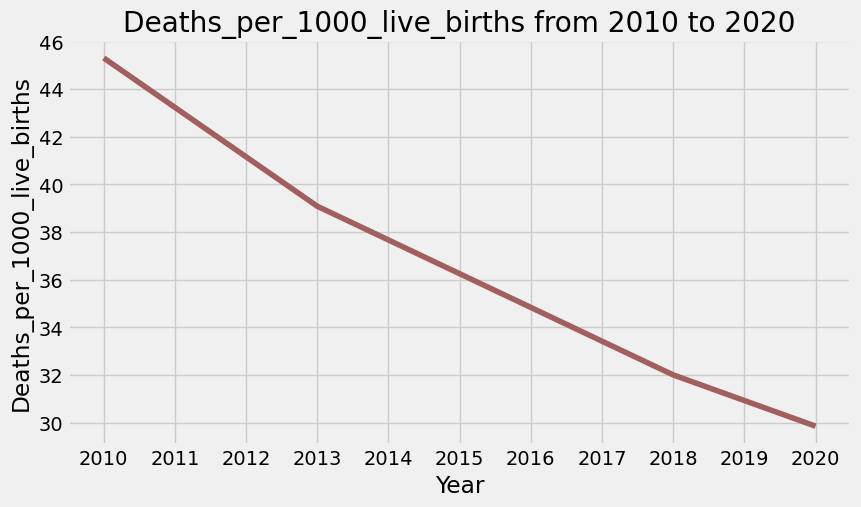

In [58]:
plt.figure(figsize=(9,5))
plt.plot(df_imr['Year'][60:71],df_imr['Deaths_per_1000_live_births'][60:71],color='#A1605E')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000_live_births')
plt.title('Deaths_per_1000_live_births from 2010 to 2020')

Text(0.5, 1.0, 'Annual Rate from 2010 to 2020')

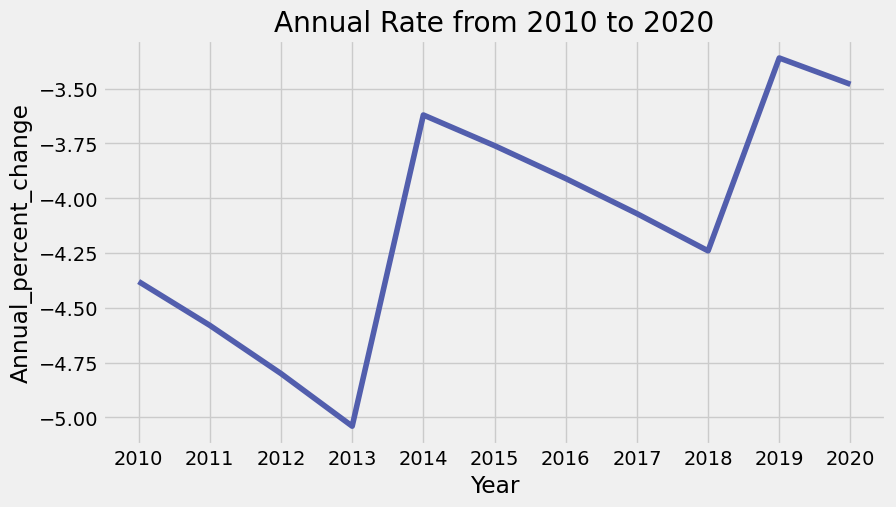

In [59]:
plt.figure(figsize=(9,5))
plt.plot(df_imr['Year'][60:71],df_imr['Annual_percent_change'][60:71],color='#525EAD')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Annual_percent_change')
plt.title('Annual Rate from 2010 to 2020')

Text(0.5, 1.0, 'Deaths_per_1000_live_births vs Annual percent change')

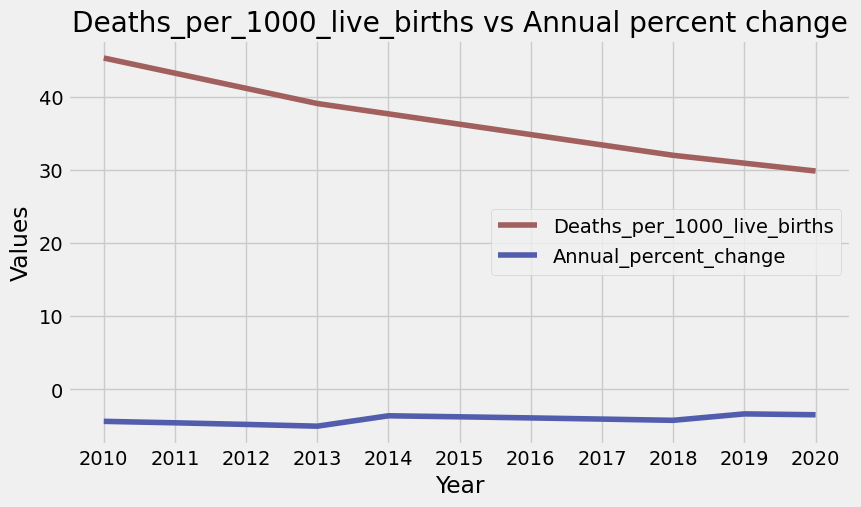

In [60]:
df_plot = df_imr[['Deaths_per_1000_live_births','Annual_percent_change']][60:71]
color=['#A1605E','#525EAD']
ax = df_plot.plot(kind='line', figsize=(9,5),color=color)
ax.set_xticks(df_imr.index[60:71]);
ax.set_xticklabels([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')
legend = plt.legend(loc='center right')
ax.set_title('Deaths_per_1000_live_births vs Annual percent change')

Text(0.5, 1.0, 'Deaths_per_1000_live_births from 2000 to 2010')

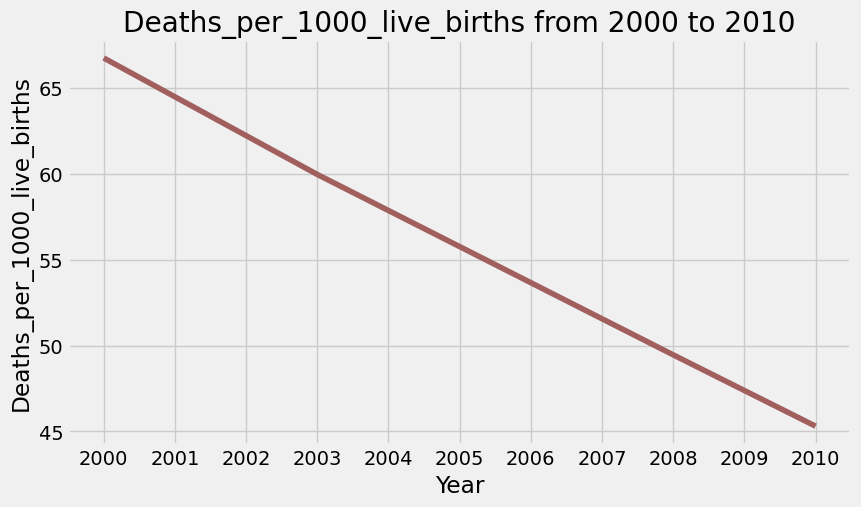

In [61]:
plt.figure(figsize=(9,5))
plt.plot(df_imr['Year'][50:61],df_imr['Deaths_per_1000_live_births'][50:61],color='#A1605E')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000_live_births')
plt.title('Deaths_per_1000_live_births from 2000 to 2010')

Text(0.5, 1.0, 'Deaths_per_1000_live_births comparison from 2000-10 2010-20')

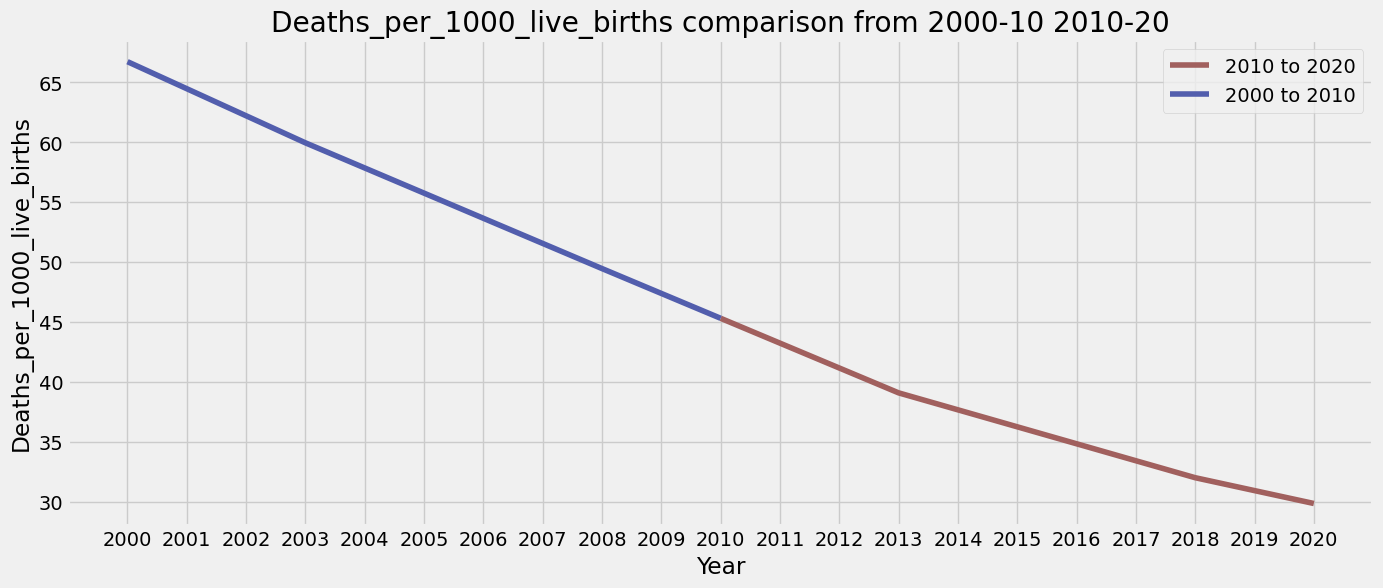

In [62]:
# comparing Death rate with previous 10 years
x = [i for i in range(50,71,1)]
y = [i for i in range(2000,2021,1)]
plt.figure(figsize=(15,6))
plt.plot(df_imr['Deaths_per_1000_live_births'][60:71], label='2010 to 2020',color='#A1605E')
plt.plot(df_imr['Deaths_per_1000_live_births'][50:61],label='2000 to 2010',color='#525EAD')
plt.xticks(x,y)
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000_live_births')
plt.legend()
plt.title('Deaths_per_1000_live_births comparison from 2000-10 2010-20')

## <h1 style="color:#A1605E">Starting with Life-Expectancy-Rate<h1><ul>
  <h3 style="color:#525EAD"><li>Reading Life-Expectancy-Rate in CSV file</li></h3>
</ul>

In [63]:
df = pd.read_csv('life-expectancy.csv',sep=r'\s*,\s*',engine='python', skiprows=15)
#print(df.head(80))
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df)

           date  Life Expectancy from Birth (Years)  Annual % Change
0    1950-12-31                              35.210              NaN
1    1951-12-31                              35.800             1.68
2    1952-12-31                              36.390             1.65
3    1953-12-31                              36.980             1.62
4    1954-12-31                              37.570             1.60
5    1955-12-31                              38.160             1.57
6    1956-12-31                              38.750             1.55
7    1957-12-31                              39.340             1.52
8    1958-12-31                              39.930             1.50
9    1959-12-31                              40.532             1.51
10   1960-12-31                              41.134             1.49
11   1961-12-31                              41.736             1.46
12   1962-12-31                              42.338             1.44
13   1963-12-31                   

## <ul>
  <h3 style="color:#525EAD"><li>Renaming types of column </li></h3>
</ul>

In [64]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Life Expectancy from Birth (Years)':'Life_expectancy'})
df = df.rename(columns={'date':'Year'})

## <ul>
  <h3 style="color:#525EAD"><li>Reading types of column </li></h3>
</ul>

In [65]:
df.dtypes

Year                      object
Life_expectancy          float64
Annual_percent_change    float64
dtype: object

## <ul>
  <h3 style="color:#525EAD"><li>Spliting column to get only year</li></h3>
</ul>

In [66]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)

## <ul>
  <h3 style="color:#525EAD"><li>checking for null values </li></h3>
</ul>

In [67]:
df.isnull().sum()

Year                     0
Life_expectancy          0
Annual_percent_change    1
dtype: int64

## <ul>
  <h3 style="color:#525EAD"><li> we will be analysing data upto year 2020 so we are slicing and creating new data frame </li></h3>
</ul>

In [68]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)
df_lf = df.iloc[:72]
df_lf.head()

,Year,Life_expectancy,Annual_percent_change
0,1950,35.21,0.00
1,1951,35.80,1.68
2,1952,36.39,1.65
3,1953,36.98,1.62
4,1954,37.57,1.60


## <html><body><ul>
  <h3 style="color:#525EAD"><li>ploting graphs and comparisions</li></h3>
</ul>

Text(0.5, 1.0, 'Life Expectancy from 2010 to 2020')

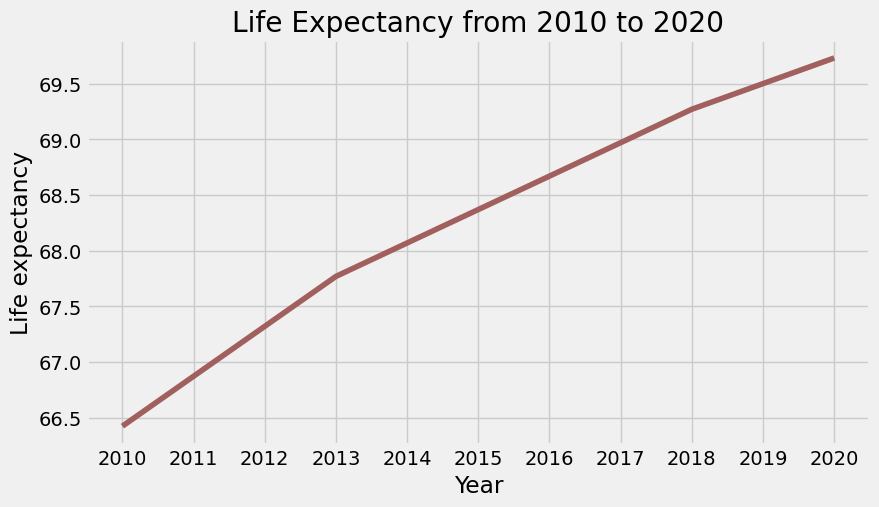

In [69]:
plt.figure(figsize=(9,5))
plt.plot(df_lf['Year'][60:71],df_lf['Life_expectancy'][60:71],color='#A1605E')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.title('Life Expectancy from 2010 to 2020')

Text(0.5, 1.0, 'Annual Rate from 2010 to 2020')

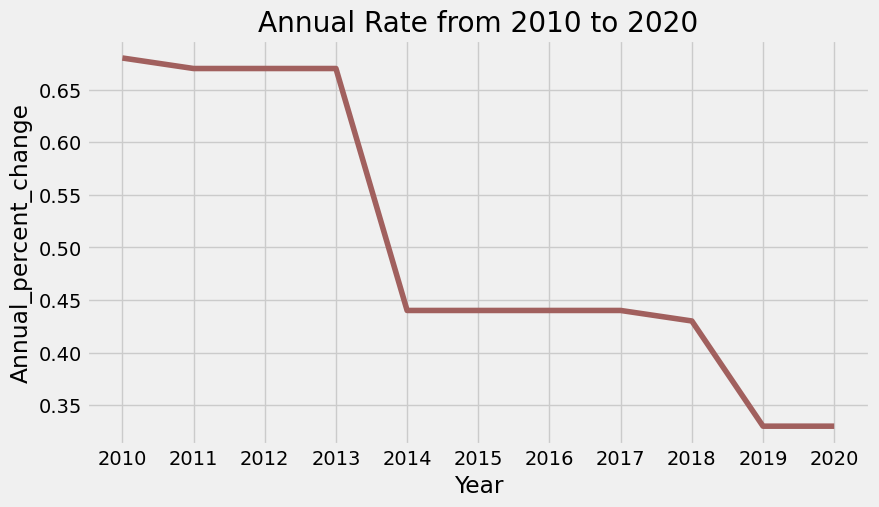

In [70]:
plt.figure(figsize=(9,5))
plt.plot(df_lf['Year'][60:71],df_lf['Annual_percent_change'][60:71],color='#A1605E')
plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel('Year')
plt.ylabel('Annual_percent_change')
plt.title('Annual Rate from 2010 to 2020')

Text(0.5, 1.0, 'Life Expectancy vs Annual percent change')

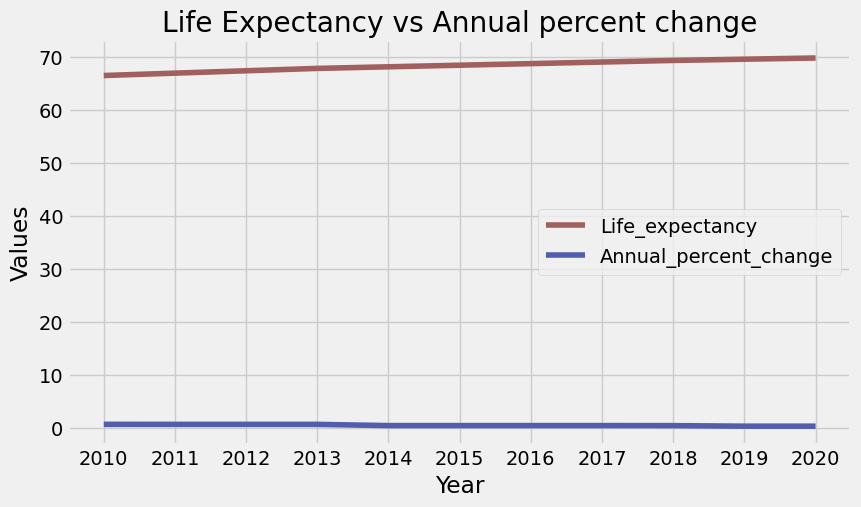

In [71]:
df_plot = df_lf[['Life_expectancy','Annual_percent_change']][60:71]
color=['#A1605E','#525EAD']
ax = df_plot.plot(kind='line', figsize=(9,5),color=color)
ax.set_xticks(df_imr.index[60:71]);
ax.set_xticklabels([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Life Expectancy vs Annual percent change')

Text(0.5, 0, 'Year')

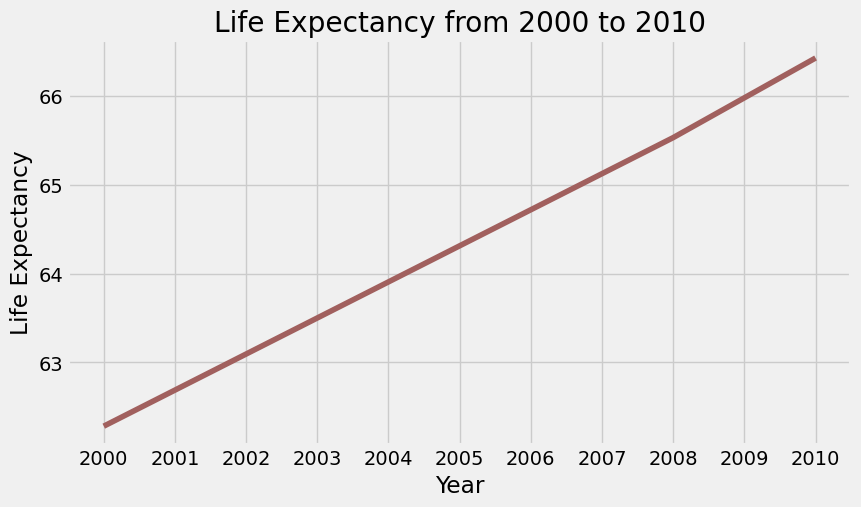

In [72]:
plt.figure(figsize=(9,5))
plt.plot(df_lf['Year'][50:61],df_lf['Life_expectancy'][50:61],color='#A1605E')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy from 2000 to 2010')
plt.xlabel('Year')

Text(0.5, 1.0, ' Life expectancy comparison from 2000-10 to 2010-20')

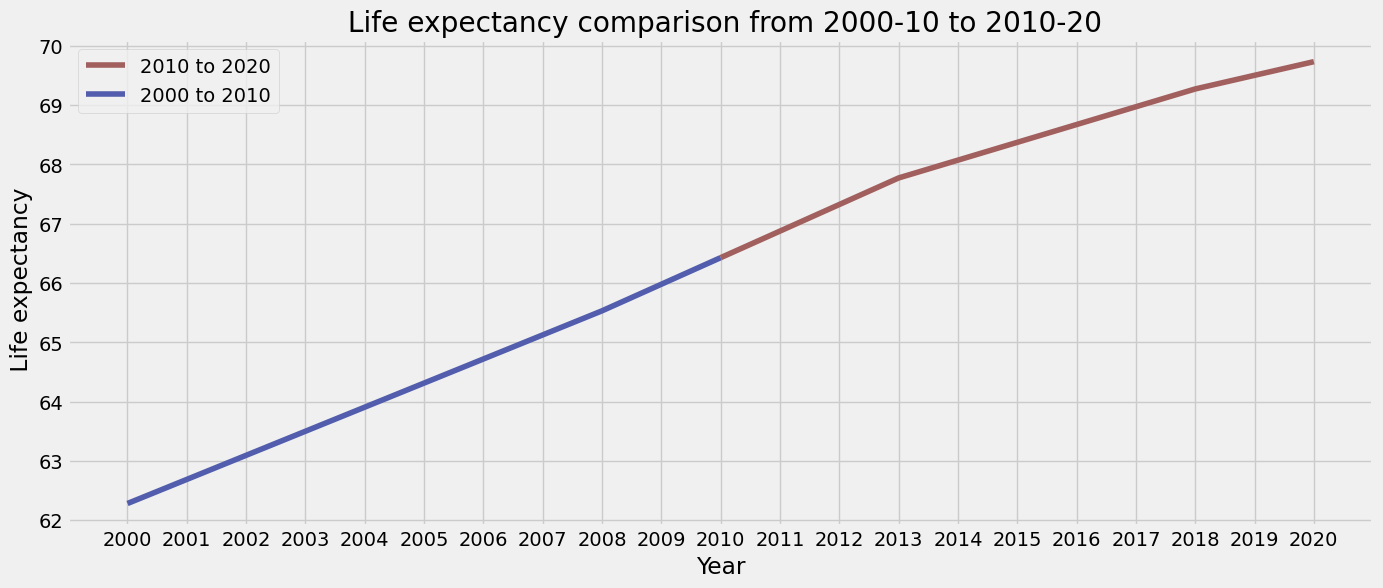

In [73]:
# comparing Life expectancy rate with previous 10 years
x = [i for i in range(50,71,1)]
y = [i for i in range(2000,2021,1)]
plt.figure(figsize=(15,6))
plt.plot(df_lf['Life_expectancy'][60:71], label='2010 to 2020',color='#A1605E')
plt.plot(df_lf['Life_expectancy'][50:61],label='2000 to 2010',color='#525EAD')
plt.xticks(x,y)
plt.xlabel('Year')
plt.ylabel(' Life expectancy')
plt.legend()
plt.title(' Life expectancy comparison from 2000-10 to 2010-20')

## <h1 style="color:#A1605E">Starting with Suicide-Rate<h1><ul>
  <h3 style="color:#525EAD"><li>Reading Suicide-Rate in CSV file</li></h3>
</ul>

In [74]:
df = pd.read_csv('suicide-rate.csv',sep=r'\s*,\s*',engine='python', skiprows=16)
#print(df.head(80))
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df)

         date  Total  Male  Female
0  31/12/2000  17.40  18.6    16.0
1  31/12/2005  17.60  18.1    17.1
2  31/12/2010  16.50  17.7    15.2
3  31/12/2015  16.50  18.5    14.9
4  31/12/2016  16.30  18.0    14.7
5  31/12/2016  17.95  21.2    14.7
6  31/12/2019  21.10  25.8    16.4


## <ul>
  <h3 style="color:#525EAD"><li>Droping Index </li></h3>
</ul>

In [75]:
#Droping 4th Index as it has same data as 5th Index
df = df.drop(df.index[4])
df

,date,Total,Male,Female
0,31/12/2000,17.40,18.6,16.0
1,31/12/2005,17.60,18.1,17.1
2,31/12/2010,16.50,17.7,15.2
3,31/12/2015,16.50,18.5,14.9
5,31/12/2016,17.95,21.2,14.7
6,31/12/2019,21.10,25.8,16.4


## <ul>
  <h3 style="color:#525EAD"><li>Renaming types of column </li></h3>
</ul>

In [76]:
df = df.rename(columns={'date':'Year'})
df = df.rename(columns={'Total':'Average'})
df = df.rename(columns={'Male':'Male'})
df = df.rename(columns={'Female':'Female'})

In [77]:
df.shape

(6, 4)

## <ul>
  <h3 style="color:#525EAD"><li>checking for null values </li></h3>
</ul>

In [78]:
df.isnull().sum()

Year       0
Average    0
Male       0
Female     0
dtype: int64

## <ul>
  <h3 style="color:#525EAD"><li>Spliting column to get only year</li></h3>
</ul>

In [79]:
df['Year'] = df['Year'].str.split('/').str[-1]
df['Year'] = df['Year'].astype(int)

In [80]:
df

,Year,Average,Male,Female
0,2000,17.40,18.6,16.0
1,2005,17.60,18.1,17.1
2,2010,16.50,17.7,15.2
3,2015,16.50,18.5,14.9
5,2016,17.95,21.2,14.7
6,2019,21.10,25.8,16.4


## <html><body><ul>
  <h3 style="color:#525EAD"><li>ploting graphs and comparisions</li></h3>
</ul>

Text(0.5, 1.0, 'Male Suicide rate till 2019')

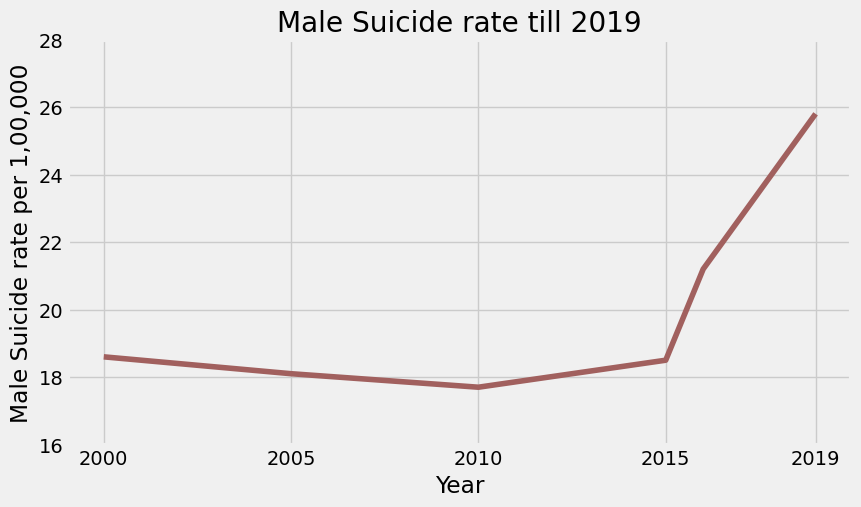

In [81]:
plt.figure(figsize=(9,5))
plt.plot(df['Year'],df['Male'],color='#A1605E')
plt.xticks([2000,2005,2010,2015,2019])
plt.xlabel('Year')
plt.ylim([16,28])
plt.ylabel('Male Suicide rate per 1,00,000')
plt.title('Male Suicide rate till 2019')

Text(0.5, 1.0, 'Female Suicide rate till 2019')

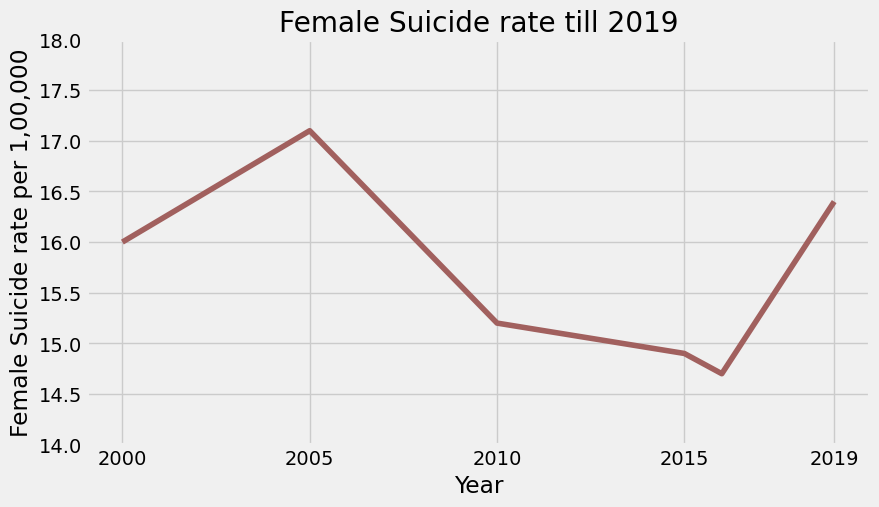

In [82]:
plt.figure(figsize=(9,5))
plt.plot(df['Year'],df['Female'],color='#A1605E')
plt.xticks([2000,2005,2010,2015,2019])
plt.xlabel('Year')
plt.ylim([14,18])
plt.ylabel('Female Suicide rate per 1,00,000')
plt.title('Female Suicide rate till 2019')

Text(0.5, 1.0, 'Average Suicide rate till 2019')

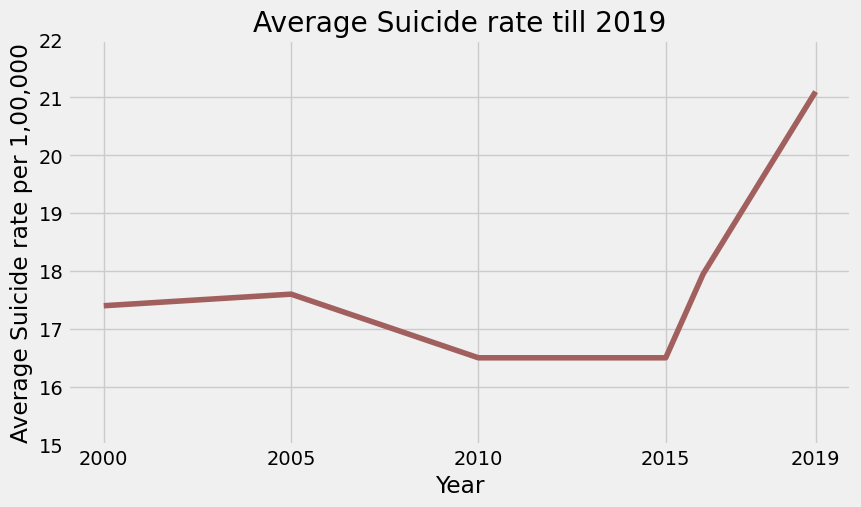

In [83]:
plt.figure(figsize=(9,5))
plt.plot(df['Year'],df['Average'],color='#A1605E')
plt.xticks([2000,2005,2010,2015,2019])
plt.ylim([15,22])
#plt.xlim([1999,2022])
plt.xlabel('Year')
plt.ylabel('Average Suicide rate per 1,00,000')
plt.title('Average Suicide rate till 2019')

In [84]:
f = []
m = []
y=[]
for i in df['Male']:
    m.append(i)
for i in df['Female']:
    f.append(i)
for i in df['Year']:
    y.append(i)
f = tuple(f)
m = tuple(m)
y = tuple(y)

Text(0.5, 1.0, 'Male vs Female Suicide rate')

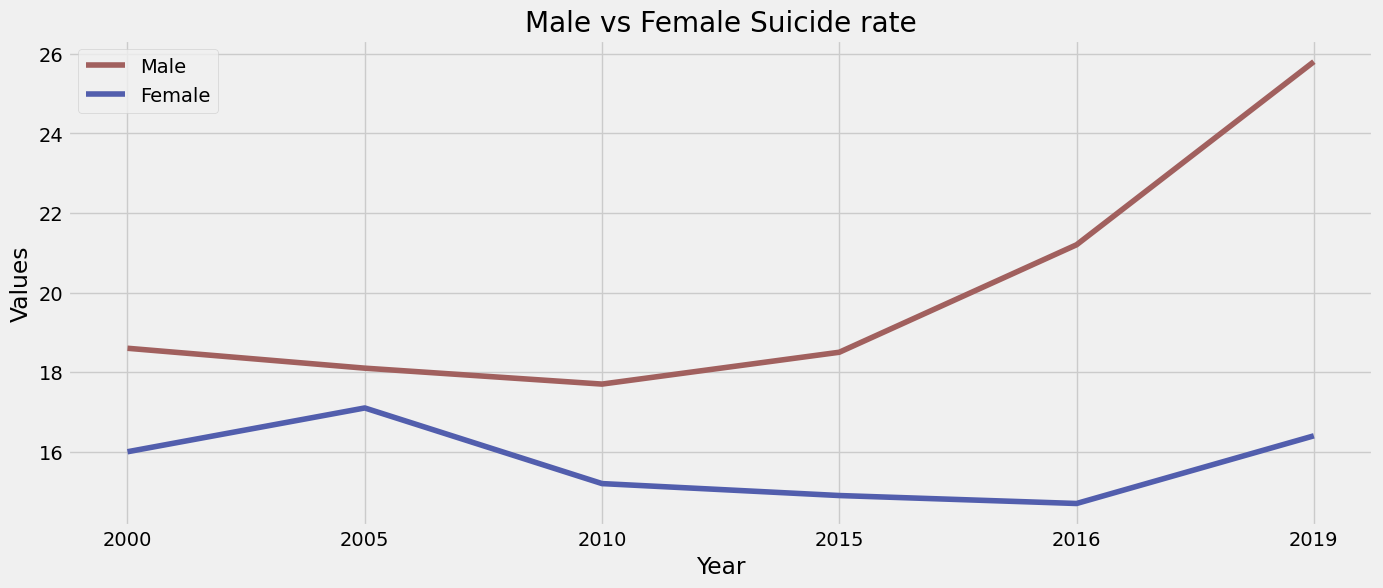

In [85]:
# comparing suicide rate with Male vs Female
plt.figure(figsize=(15,6))
ax = plt.plot(m, label='Male',color='#A1605E')
ax2 = plt.plot(f,label='Female',color='#525EAD')

#plt.ylim([12,28])
plt.xticks(np.arange(6), ['2000','2005', '2010', '2015', '2016', '2019'])
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.title('Male vs Female Suicide rate')

In [86]:
df

,Year,Average,Male,Female
0,2000,17.40,18.6,16.0
1,2005,17.60,18.1,17.1
2,2010,16.50,17.7,15.2
3,2015,16.50,18.5,14.9
5,2016,17.95,21.2,14.7
6,2019,21.10,25.8,16.4
